<a href="https://colab.research.google.com/github/ivanozono/python_DataAnalyts/blob/main/Pivot_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot Tables

In [1]:
## import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## load dataset from the SNS module
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic[['adult_male','age']]

,adult_male,age
0,True,22.0
1,False,38.0
2,False,26.0
3,False,35.0
4,True,35.0
...,...,...
886,True,27.0
887,False,19.0
888,False,NaN
889,True,26.0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


As the output shows, this contains a number of data points on each passenger on that ill-fated voyage, including sex, age, class, fare paid, and much more.

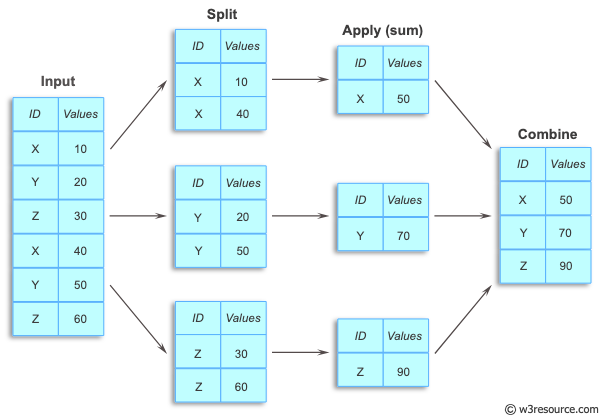

In [6]:
titanic.groupby('embarked').mean()

<ipython-input-6-8e7849956c0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby('embarked').mean()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embarked,,,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.535714,0.505952
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.480519,0.740260
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.636646,0.610248


In [7]:
## groupby by the category
sex_gb = titanic.groupby('embarked')[['survived']].mean()
sex_gb

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [8]:
sex_gb.columns

Index(['survived'], dtype='object')

In [9]:
#gby1 = titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack(0)
gby1

NameError: ignored

In [ ]:
gby1.columns

In [ ]:
gby1.index

In [ ]:
titanic.groupby(['class', 'sex'])['survived'].aggregate('mean').unstack(0)

In [ ]:
#gby2 = titanic.groupby(['sex', 'class'])['survived'].mean().reset_index()
gby2

In [ ]:
gby2.columns

In [ ]:
gby2.index

In [ ]:
gby2.iloc[0:2,0:2]

## Pivot Table Syntax

Here is the equivalent to the preceding operation using the `DataFrame.pivot_table` method:

In [ ]:
pvt_cls = titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')
pvt_cls

### Multilevel Pivot Tables

Just as in a `groupby`, the grouping in pivot tables can be specified with multiple levels and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the `pd.cut` function:

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

We can apply the same strategy when working with the columns as well; let's add info on the fare paid, using `pd.qcut` to automatically compute quantiles:

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

### Additional Pivot Table Options

The full call signature of the `DataFrame.pivot_table` method is as follows:

```python
# call signature as of Pandas 1.3.5
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All', observed=False,
                      sort=True)
```

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

Notice also here that we've omitted the `values` keyword; when specifying a mapping for `aggfunc`, this is determined automatically.

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

Here, this automatically gives us information about the class-agnostic survival rate by sex, the sex-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the `margins_name` keyword; it defaults to `"All"`.

In [ ]:
# shell command to download the data:
#!cd data && curl -O \
data=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

In [ ]:
data.head()

In [ ]:
births = data

In [ ]:
#births = pd.read_csv('data/births.csv')

Taking a look at the data, we see that it's relatively simple—it contains the number of births grouped by date and gender:

In [ ]:
births.shape

In [ ]:
births.head()

We can start to understand this data a bit more by using a pivot table.
Let's add a `decade` column, and take a look at male and female births as a function of decade:

In [ ]:
births['year'] // 10

In [ ]:
## create a new column called 'decade'
births['decade'] = 10 * (births['year'] // 10)
births.head()

In [ ]:
births.describe().transpose()

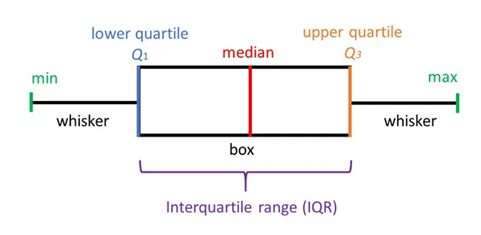

In [ ]:
births.decade.value_counts().sum()

In [ ]:
pvt_sum = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
pvt_sum

In [ ]:
sns.histplot(data=births, x='births')

We see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year, as shown in the following figure (see [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) for a discussion of plotting with Matplotlib):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
births.pivot_table(
    'births', index='year', columns='gender', aggfunc='sum').plot(figsize=(20, 5))
)
plt.ylabel('total births per year');

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])

In [ ]:
quartiles

In [ ]:
mu = quartiles[1]
mu

In [ ]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

In [ ]:
births_subset = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [ ]:
births_subset.shape

In [ ]:
sns.histplot(data=births_subset, x='births')

Next we set the `day` column to integers; previously it had been a string column because some columns in the dataset contained the value `'null'`:

In [ ]:
births_subset.info()

In [ ]:
births.isnull().sum()

In [ ]:
# set 'day' column to integer; it originally was a string due to nulls
births_subset['day'] = births_subset['day'].astype(int)

In [ ]:
births_subset.info()

In [ ]:
# create a datetime index from the year, month, day
births_subset.index = pd.to_datetime(10000 * births_subset.year +
                              100 * births_subset.month +
                              births_subset.day, format='%Y%m%d')

births_subset['dayofweek'] = births_subset.index.dayofweek

In [ ]:
births_subset.head()

Using this, we can plot births by weekday for several decades (see the following figure):

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births_subset.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [ ]:
births_by_date = births_subset.pivot_table('births', 
                                    [births_subset.index.month, births_subset.index.day])
births_by_date.head()

The result is a multi-index over months and days.
To make this visualizable, let's turn these months and days into dates by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!):

In [ ]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year.
From this, we can use the `plot` method to plot the data. It reveals some interesting trends, as you can see in the following figure:

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# Generate a plot of the birth total for each day or the month, by decades